In [36]:
import sys
import healpy as hp
from astropy import units
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('/Users/rebeccaceppas/Desktop/CHORD/spatial_matched_filter')

import maps

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Define resolution of map

In [61]:
nside = 128
resolution = (hp.nside2resol(nside) * units.rad).to(units.deg).value

# Initialize an input map and create a 2d map

Text(0, 0.5, 'dec')

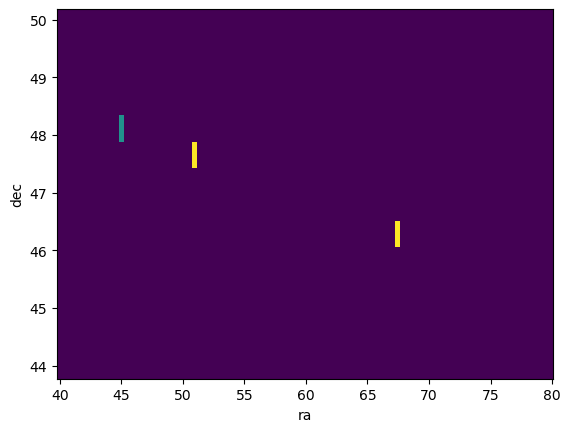

In [62]:
input_map = maps.InputMap(ra_max=80, ra_min=40, 
                          dec_max=50, dec_min=44,
                          nsources=3, 
                          resolution=resolution)

map2d = input_map.get_2d_map(brightness=[1,1,0.5])

plt.pcolor(input_map.ra, input_map.dec, map2d)
plt.xlabel('ra')
plt.ylabel('dec')

# Add instrumental effects

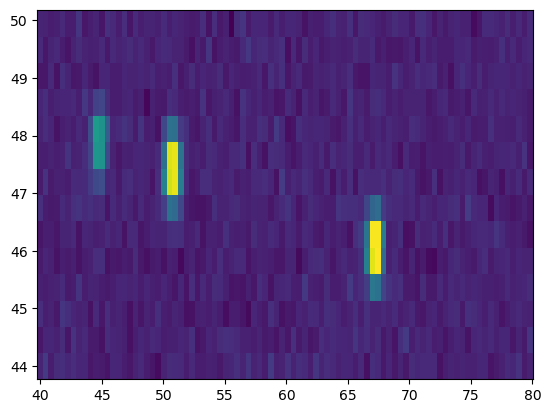

In [63]:
beam = maps.gaussian_beam(map2d.shape[0], map2d.shape[1], 1)
map_obs = input_map.observe(map2d, beam, add_noise=True, noise_std=3e-2)

plt.pcolor(input_map.ra, input_map.dec, map_obs)
plt.show()

# Turn into 1d map

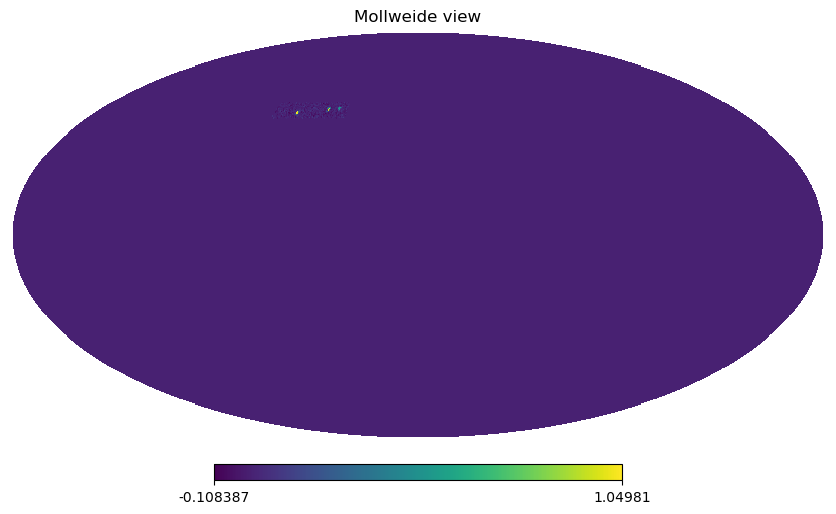

In [66]:
map1d = input_map.get_1d_map(nside=nside, map_2d=map_obs)
hp.mollview(map1d)

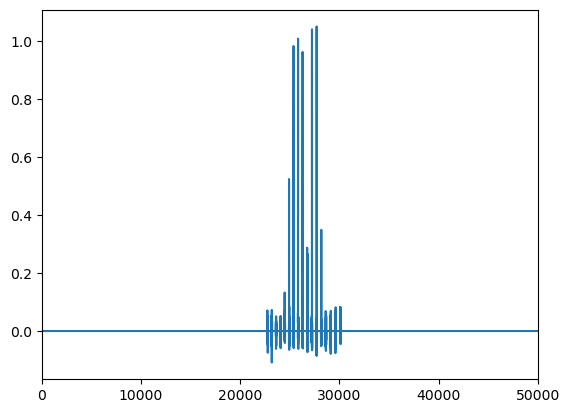

In [67]:
plt.plot(map1d)
plt.xlim(0,50000)
plt.show()

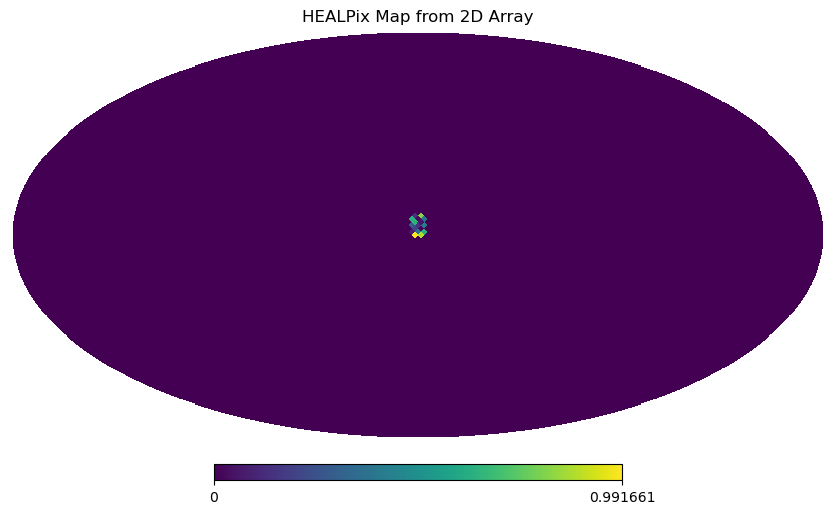

In [3]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

# Example 2D array
nside = 32  # HEALPix resolution parameter
npix = hp.nside2npix(nside)
nlat, nlon = 180, 360  # Assuming 1 degree resolution for simplicity
data_2d = np.random.rand(nlat, nlon)

# Create a HEALPix map
healpix_map = np.zeros(npix)

# Convert 2D array to HEALPix map
for ilat in range(nlat):
    for ilon in range(nlon):
        theta = np.radians(90 - (ilat + 0.5))  # Latitude to colatitude
        phi = np.radians(ilon + 0.5)  # Longitude to azimuth
        pix = hp.ang2pix(nside, theta, phi, lonlat=True)
        healpix_map[pix] = data_2d[ilat, ilon]

# Plot the HEALPix map
hp.mollview(healpix_map, title="HEALPix Map from 2D Array")
plt.show()


In [8]:
indd = np.indices([data_2d.shape[0], data_2d.shape[1]])

In [9]:
indd.shape

(2, 180, 360)

In [5]:
data_2d.shape

(180, 360)

In [ ]:
np.indices()

In [15]:
pixx = np.arange(20)

In [18]:
pixx.min()

0

In [20]:
map_2d = np.zeros((10,10))

In [26]:
map_2d[[1,2], [0,1]]

array([0., 0.])

In [31]:
locations = [(23, 50), (20, 54), (80, 52), (0,45)]

In [32]:
locations = np.array(locations)

In [33]:
locations.shape

(4, 2)

In [37]:
locations[:,0]

array([23, 20, 80,  0])